<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/Attention_compute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import

In [12]:
from tensorflow.keras.layers import Dot, Activation, Concatenate
import numpy as np


E: Encoder Output (4 timestep, 3 features)  
D: Decoder Hidden State (4 timestep, 3 features)

In [15]:
E = np.array([[[0.707, 0.616, 0.852],    #e1
               [0.19 , 0.113, 0.123],    #e2
               [0.757, 0.022, 0.236],    #e3
               [0.54 , 0.923, 0.412]]])  #e4

D = np.array([[[0.786, 0.634, 0.873],    #d1
               [0.796, 0.949, 0.872],    #d2
               [0.704, 0.314, 0.912],    #d3
               [0.293, 0.075, 0.73 ]]])  #d4


In [23]:
def AttentionLayer(d, e):
    dot_product = Dot(axes=(2, 2))([d, e]) #1
    score = Activation('softmax')(dot_product)
    value = Dot(axes=(2, 1))([score, e])
    output = Concatenate()([value, d])
    return dot_product, score, value, output


In [21]:
# 1
"""
d1*e1 = 0.786*0.707 + 0.634*0.616 + 0.873*0.852 = 1.690042
d1*e2 = 0.786*0.19 + 0.634*0.113 + 0.873*0.123 = 0.32861
.
.
.
= d1*e1 , d1*e2 , d1*e3 , d1*e4 , d1*e5
= .....

"""
Dot(axes=(2, 2))([D, E]) #มิติที่ 2 ของ D , E

<tf.Tensor: shape=(1, 4, 4), dtype=float32, numpy=
array([[[1.690042  , 0.328361  , 0.81497806, 1.3692981 ],
        [1.8903    , 0.365733  , 0.82924205, 1.6650311 ],
        [1.468176  , 0.281418  , 0.755068  , 1.0457261 ],
        [0.875311  , 0.153935  , 0.39573103, 0.52820504]]], dtype=float32)>

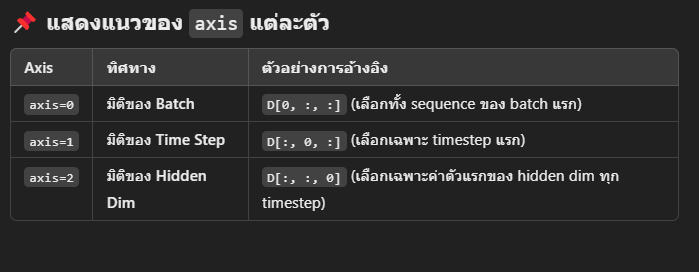



```
Batch    Time Steps (Decoder)   Hidden Dim
  ↓           ↓                    ↓
( 1 ,  [ [ 0.786, 0.634, 0.873 ],  # d1
          [ 0.796, 0.949, 0.872 ],  # d2
          [ 0.704, 0.314, 0.912 ],  # d3
          [ 0.293, 0.075, 0.73  ] ] )  # d4
```



In [22]:
# 2
dot = Dot(axes=(2, 2))([D, E])
Activation('softmax')(dot) #แต่ละ แถวไปคำนวณ

<tf.Tensor: shape=(1, 4, 4), dtype=float32, numpy=
array([[[0.416897  , 0.1068214 , 0.17377742, 0.30250424],
        [0.42335096, 0.09216999, 0.1465173 , 0.3379617 ],
        [0.40803555, 0.12453617, 0.19998579, 0.26744244],
        [0.3556369 , 0.17286903, 0.22015466, 0.2513394 ]]], dtype=float32)>

In [24]:

d, s, v, o = AttentionLayer(D, E)

print("\nDot-product:")
print(np.round(d, 3))

print("\nScore:")
print(np.round(s, 3))

print("\nAttention values:")
print(np.round(v, 3))

print("\nAttentional hidden states:")
print(np.round(o, 3))

# verification of the first row of attention value
v1 = np.round(E[0,0,:] * s[0,0,0], 3)
v2 = np.round(E[0,1,:] * s[0,0,1], 3)
v3 = np.round(E[0,2,:] * s[0,0,2], 3)
v4 = np.round(E[0,3,:] * s[0,0,3], 3)
v=np.array([v1,v2,v3,v4])
np.round(np.sum(v, axis=0), 2)


Dot-product:
[[[1.69  0.328 0.815 1.369]
  [1.89  0.366 0.829 1.665]
  [1.468 0.281 0.755 1.046]
  [0.875 0.154 0.396 0.528]]]

Score:
[[[0.417 0.107 0.174 0.303]
  [0.423 0.092 0.147 0.338]
  [0.408 0.125 0.2   0.267]
  [0.356 0.173 0.22  0.251]]]

Attention values:
[[[0.61  0.552 0.534]
  [0.61  0.586 0.546]
  [0.608 0.517 0.52 ]
  [0.587 0.475 0.48 ]]]

Attentional hidden states:
[[[0.61  0.552 0.534 0.786 0.634 0.873]
  [0.61  0.586 0.546 0.796 0.949 0.872]
  [0.608 0.517 0.52  0.704 0.314 0.912]
  [0.587 0.475 0.48  0.293 0.075 0.73 ]]]


array([0.61, 0.55, 0.53], dtype=float32)